In [19]:
from astropy.io import fits
import matplotlib.pyplot as plt
from importlib import reload
import numpy as np
%matplotlib inline

In [20]:
import lib
reload(lib)

<module 'lib' from '/home/zazbone/Documents/tp_astro/lib.py'>

In [21]:
file = "ztf_20180325251921_000314_zg_c08_o_q2_sciimg.fits"

In [22]:
image = fits.open(file)[0]
imgdat = image.data

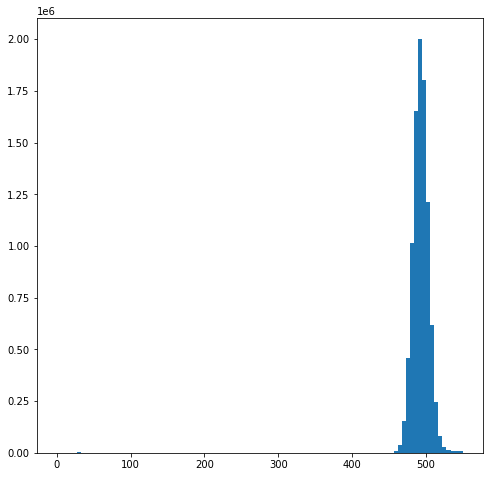

In [23]:
fig = plt.figure(figsize=(8, 8))
plt.hist(imgdat.flatten(), bins=100, range=[0,550]);

In [24]:
bkg = np.median(imgdat)
imgdenoise = imgdat - bkg

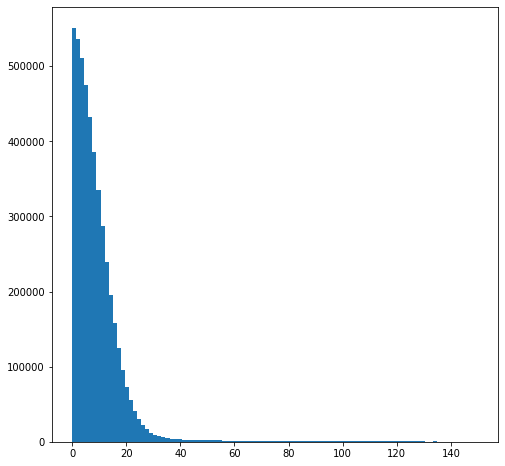

In [25]:
fig = plt.figure(figsize=(8, 8))
plt.hist(imgdenoise.flatten(), bins=100, range=[0,150]);

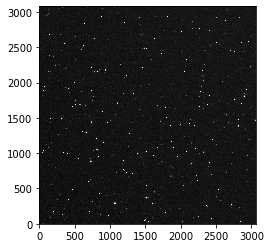

In [26]:
plt.imshow(imgdat, interpolation='nearest', origin='lower', cmap='gray', vmin=450, vmax=1000)
plt.imsave("imgraw.png", imgdat, vmin=450, vmax=1000, cmap="gray", origin="lower")

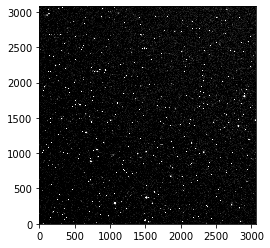

In [48]:
plt.imshow(imgdenoise, interpolation='nearest', origin='lower', cmap='gray', vmin=0, vmax=150)
plt.imsave("imgdenoise.png", imgdenoise, vmin=0, vmax=200, cmap="gray", origin="lower")

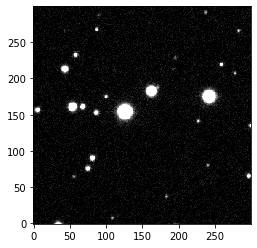

In [28]:
plt.imshow(imgdenoise[2000:2300, 700:1000], interpolation='nearest', origin='lower', cmap='gray', vmin=0, vmax=150)

1504 1804 11


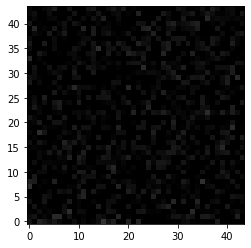

In [32]:
reload(lib)
starit = iter(lib.in_row(imgdenoise, 1500, 5, 20))
cx, cy, r = next(starit)
r = int(r) + 2
print(cx, cy, r)
plt.imshow(imgdenoise[cy - 2 * r:cy + 2 * r, cx - 2 * r:cx + 2 * r], interpolation='nearest', origin='lower', cmap='gray', vmin=0, vmax=150)

1504 1804 9


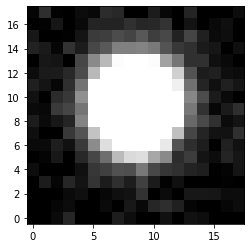

In [47]:
i = imgdenoise
reload(lib)
starit = iter(lib.in_row(i, 1500, 5, 20))
cx, cy, r = next(starit)
r = int(r)
print(cx, cy, r)
plt.imshow(i[cx - r:cx +  r, cy -  r:cy + r], interpolation='nearest', origin='lower', cmap='gray', vmin=0, vmax=150)

68


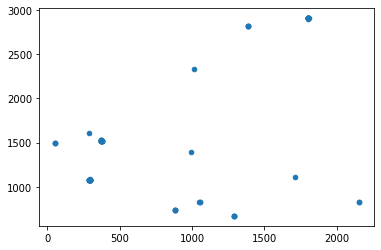

In [86]:
i = 0
reload(lib)
x = []
y = []
ri = []
for rd in np.random.randint(0, 3000, 500):
    for cx, cy, r in lib.in_row(imgdenoise, rd, 10, 20):
        r = int(r)
        x.append(cx)
        y.append(cy)
        ri.append(r)
        #plt.figure().clear()
        #plt.imsave(f"result/imgraw{i}.png", imgdenoise[cx - r:cx +  r, cy -  r:cy + r], vmin=0, vmax=200, cmap="gray", origin="lower");
        i += 1
print(i)
plt.scatter(x, y, r)